# Pose Analyzer

## Integrantes

* Juan Sebastián Díaz
* Juan Sebastián Libreros

In [17]:
# Instalación de paquetes necesarios
%pip install pandas numpy matplotlib scikit-learn scipy xgboost
# Instalación de paquetes adicionales necesarios para procesar videos
%pip install opencv-python mediapipe ipywidgets


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Preprocesamiento de datos

Primero haremos el correcto procesamiento de los datos para poder crear un dataset robusto con el cual poder entrenar el modelo

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [3]:
data = pandas.read_csv('./dataset/metadata/pose_data.csv')

data.head(10)

,video,frame_idx,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,andres_caminar1.MOV,1,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,andres_caminar1.MOV,2,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,andres_caminar1.MOV,3,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,andres_caminar1.MOV,4,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,andres_caminar1.MOV,5,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,andres_caminar1.MOV,6,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,andres_caminar1.MOV,7,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,andres_caminar1.MOV,8,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,andres_caminar1.MOV,9,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,andres_caminar1.MOV,10,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11104 entries, 0 to 11103
Columns: 135 entries, video to visibility_32
dtypes: float64(132), int64(1), object(2)
memory usage: 11.4+ MB


In [5]:
#Removemos las columnas identificadoras que no aporta informacion relevante
data = data.drop(columns=['video', 'frame_idx'])
data.head(10)

,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,visibility_1,x_2,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,0.999938,0.295986,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,0.999934,0.295985,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,0.999929,0.295999,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,0.999926,0.296014,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,0.999923,0.296013,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,0.999920,0.296012,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,0.999916,0.296023,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,0.999914,0.296071,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,0.999912,0.296143,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,0.999912,0.296214,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [6]:
#Ahora removemos las columnas visibility ya que no aportan informacion relevante
columns_to_remove = [col for col in data.columns if 'visibility' in col]
data = data.drop(columns=columns_to_remove)
data.head(10)

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.301972,0.477756,-0.193664,0.295878,0.470828,-0.184601,0.295986,0.467288,-0.184607,...,0.132016,0.545631,0.499265,0.121710,0.555963,0.438278,0.058729,0.554118,0.501604,0.045032
1,caminar,0.301838,0.477256,-0.129946,0.295870,0.470535,-0.120004,0.295985,0.466606,-0.120026,...,0.106420,0.544423,0.503944,0.101112,0.555721,0.438236,0.037273,0.554111,0.513806,0.030807
2,caminar,0.301795,0.477179,-0.132016,0.295879,0.470511,-0.121953,0.295999,0.466463,-0.121977,...,0.106671,0.543323,0.506611,0.090213,0.555446,0.437672,0.039159,0.553865,0.515678,0.019650
3,caminar,0.301776,0.477158,-0.129659,0.295891,0.470543,-0.119794,0.296014,0.466465,-0.119818,...,0.097965,0.543201,0.506563,0.089286,0.555415,0.437371,0.030130,0.553863,0.517355,0.019333
4,caminar,0.301736,0.477175,-0.131916,0.295887,0.470698,-0.122057,0.296013,0.466518,-0.122078,...,0.101283,0.543258,0.506265,0.089644,0.555364,0.437042,0.032270,0.554018,0.517730,0.018779
5,caminar,0.301701,0.477188,-0.124873,0.295883,0.470758,-0.115134,0.296012,0.466531,-0.115158,...,0.097104,0.543299,0.505997,0.093152,0.555350,0.437333,0.028065,0.554161,0.518750,0.022909
6,caminar,0.301702,0.477188,-0.127569,0.295889,0.470763,-0.117938,0.296023,0.466530,-0.117961,...,0.097645,0.543333,0.505792,0.094566,0.555371,0.437514,0.028523,0.554273,0.518797,0.024545
7,caminar,0.301753,0.477189,-0.132511,0.295932,0.470767,-0.122863,0.296071,0.466529,-0.122885,...,0.096358,0.543606,0.505704,0.092279,0.555597,0.437737,0.025724,0.554484,0.519127,0.020917
8,caminar,0.301854,0.477153,-0.137571,0.296009,0.470759,-0.127995,0.296143,0.466502,-0.128015,...,0.099912,0.543798,0.505669,0.093374,0.555960,0.437884,0.028502,0.554694,0.519677,0.020699
9,caminar,0.301989,0.477111,-0.139037,0.296090,0.470753,-0.129757,0.296214,0.466482,-0.129777,...,0.100442,0.544175,0.505791,0.089436,0.556203,0.438295,0.028044,0.554988,0.519221,0.015136


In [7]:
print("Número de filas y columnas:", data.shape)
print("Nombres de las columnas:", data.columns.tolist())
# Revisar valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

Número de filas y columnas: (11104, 100)
Nombres de las columnas: ['label', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23', 'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27', 'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']
Valores nulos por columna:
 label    0
x_0      0
y_0      0
z_0      0
x_1      0
        ..
y_31     0
z_31     0
x_32     0
y_32     0
z_32     0
Length: 100, 

# Normalización de los datos

In [8]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['number']).columns

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data.head()

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.628225,-0.311245,-0.162426,0.674120,-0.307456,-0.126584,0.674218,-0.289069,-0.126602,...,-0.017345,-1.909675,-0.632262,-0.153380,-1.962599,-0.271118,0.081251,-1.977013,-0.704238,-0.068272
1,caminar,0.626904,-0.318929,0.193116,0.674050,-0.312136,0.275545,0.674207,-0.299956,0.275431,...,-0.151824,-1.920426,-0.563807,-0.260579,-1.964677,-0.271585,-0.024431,-1.977078,-0.570695,-0.137436
2,caminar,0.626482,-0.320110,0.181564,0.674130,-0.312524,0.263408,0.674346,-0.302248,0.263285,...,-0.150506,-1.930223,-0.524794,-0.317301,-1.967030,-0.277815,-0.015139,-1.979179,-0.550208,-0.191681
3,caminar,0.626296,-0.320426,0.194716,0.674248,-0.312015,0.276851,0.674487,-0.302204,0.276722,...,-0.196245,-1.931311,-0.525503,-0.322123,-1.967296,-0.281141,-0.059611,-1.979193,-0.531848,-0.193222
4,caminar,0.625898,-0.320165,0.182127,0.674211,-0.309527,0.262761,0.674482,-0.301369,0.262653,...,-0.178810,-1.930801,-0.529854,-0.320262,-1.967729,-0.284774,-0.049074,-1.977871,-0.527747,-0.195913


# Reducir dimensionalidad (PCA)

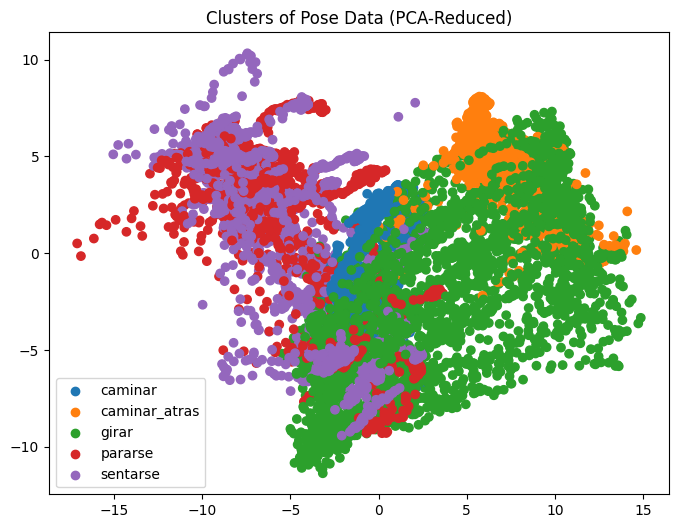

In [9]:
from sklearn.decomposition import PCA

labels = data['label']

data_features = data.drop(columns=['label'])

X = StandardScaler().fit_transform(data_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.title("Clusters of Pose Data (PCA-Reduced)")

for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=label)

plt.legend()
plt.show()

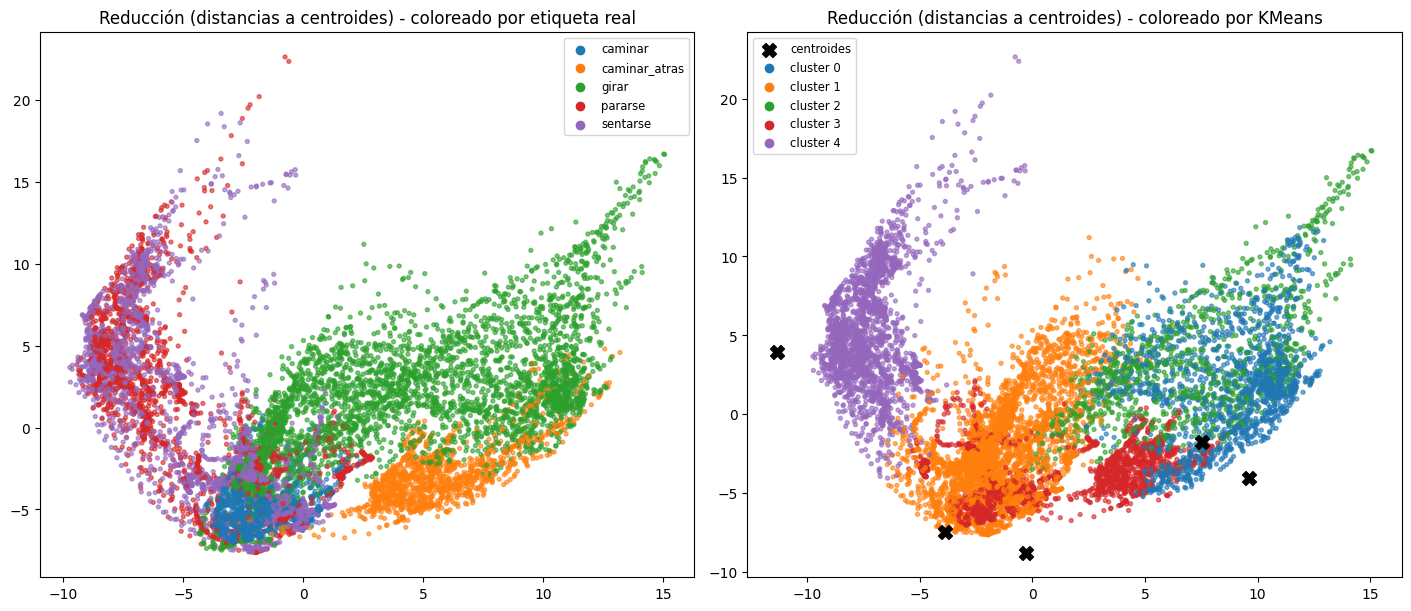

In [10]:
from sklearn.cluster import KMeans

n_clusters = len(unique_labels)

# Entrenar KMeans sobre X (ya estandarizado en la sesión)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
kmeans.fit(X)
klabels = kmeans.labels_

# Obtener representación reducida: distancias a centroides (dim = n_clusters)
X_km = kmeans.transform(X)

# Reducir esas distancias a 2D para visualización con PCA
pca_km = PCA(n_components=2)
X_km_2d = pca_km.fit_transform(X_km)

# Centroides proyectados a 2D
# Nota: los centroides de KMeans están en el espacio original (99 dims).
# Primero obtenemos su representación en el espacio "distancias a centroides" usando kmeans.transform(...)
centroids_2d = pca_km.transform(kmeans.transform(kmeans.cluster_centers_))

# Plot: comparación visual entre etiquetas reales y clusters de KMeans sobre la reducción
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Izquierda: coloreado por etiqueta real
axes[0].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[label_colors[l] for l in labels], s=8, alpha=0.6)
axes[0].set_title("Reducción (distancias a centroides) - coloreado por etiqueta real")
for lab, col in label_colors.items():
    axes[0].scatter([], [], color=col, label=lab)
axes[0].legend(loc='best', fontsize='small')

# Derecha: coloreado por cluster asignado por KMeans
cmap = plt.get_cmap('tab10')
cluster_colors = [cmap(i) for i in range(n_clusters)]
axes[1].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[cluster_colors[i] for i in klabels], s=8, alpha=0.6)
# marcar centroides
axes[1].scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', s=100, marker='X', label='centroides')
for i, col in enumerate(cluster_colors):
    axes[1].scatter([], [], color=col, label=f'cluster {i}')
axes[1].set_title("Reducción (distancias a centroides) - coloreado por KMeans")
axes[1].legend(loc='best', fontsize='small')

plt.show()

# Filtrado suave

In [11]:
data['frame_id'] = data.groupby('label').cumcount()
data = data.sort_values(['label', 'frame_id'])

C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\3663056710.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['frame_id'] = data.groupby('label').cumcount()


In [12]:
from scipy.signal import savgol_filter

window_size = 5
poly_order = 2 

for col in [c for c in data.columns if c.startswith(('x_', 'y_', 'z_'))]:
    data[col] = savgol_filter(data[col], window_size, poly_order)


In [13]:
for i in range(33):
    for axis in ['x', 'y', 'z']:
        col = f'{axis}_{i}'
        data[f'vel_{axis}_{i}'] = data[col].diff().fillna(0)


C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\77369803.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'vel_{axis}_{i}'] = data[col].diff().fillna(0)
C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\77369803.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'vel_{axis}_{i}'] = data[col].diff().fillna(0)
C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\77369803.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [14]:
import numpy as np

def angle_3d(a, b, c):
    ba = a - b
    bc = c - b
    cosang = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosang, -1.0, 1.0)))

angles = []
for idx in range(len(data)):
    a = np.array([data.loc[idx, f'{axis}_11'] for axis in ['x', 'y', 'z']])
    b = np.array([data.loc[idx, f'{axis}_13'] for axis in ['x', 'y', 'z']])
    c = np.array([data.loc[idx, f'{axis}_15'] for axis in ['x', 'y', 'z']])
    angles.append(angle_3d(a, b, c))

data['angle_brazo_derecho'] = angles


C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\4201067408.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['angle_brazo_derecho'] = angles


In [15]:
data['inclinacion_tronco'] = np.degrees(np.arctan2(
    (data['y_24'] + data['y_23'])/2 - (data['y_12'] + data['y_11'])/2,
    (data['z_24'] + data['z_23'])/2 - (data['z_12'] + data['z_11'])/2
))


C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\126863071.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['inclinacion_tronco'] = np.degrees(np.arctan2(


In [18]:
# Agrupación de fotogramas en ventanas deslizantes con redundancia
import numpy as np
import pandas as pd

# Parámetros de ventana
WINDOW_SIZE = 30  # 30 frames = 1 segundo a 30 FPS
HOP_SIZE = 10     # Paso de 10 frames (redundancia: 20 frames solapados)

def create_overlapping_windows(df, window_size=30, hop_size=10):
    """
    Crea ventanas deslizantes con redundancia (overlapping).
    Cada ventana contiene múltiples frames agregados estadísticamente.
    """
    grouped_windows = []
    
    # Agrupar por label (cada video/actividad)
    for label_name, label_group in df.groupby('label'):
        label_group = label_group.sort_values('frame_id').reset_index(drop=True)
        num_frames = len(label_group)
        
        # Crear ventanas deslizantes
        for start in range(0, num_frames - window_size + 1, hop_size):
            end = start + window_size
            window = label_group.iloc[start:end].copy()
            
            # Crear registro agregado para esta ventana
            window_record = {'label': label_name}
            
            # Obtener todas las columnas numéricas (excepto frame_id)
            numeric_cols = window.select_dtypes(include=[np.number]).columns
            numeric_cols = [col for col in numeric_cols if col != 'frame_id']
            
            # Calcular estadísticas para cada feature
            for col in numeric_cols:
                values = window[col].values
                window_record[f'{col}_mean'] = np.mean(values)
                window_record[f'{col}_std'] = np.std(values) if len(values) > 1 else 0
                window_record[f'{col}_min'] = np.min(values)
                window_record[f'{col}_max'] = np.max(values)
                window_record[f'{col}_median'] = np.median(values)
                # Opcional: percentiles
                window_record[f'{col}_p25'] = np.percentile(values, 25)
                window_record[f'{col}_p75'] = np.percentile(values, 75)
            
            grouped_windows.append(window_record)
    
    return pd.DataFrame(grouped_windows)

# Aplicar agrupación
print(f"Forma antes de agrupación: {data.shape}")
data = create_overlapping_windows(data, window_size=30, hop_size=10)
print(f"Forma después de agrupación: {data.shape}")
print(f"\nEjemplo de columnas generadas: {list(data.columns[:10])}")
data.head()

Forma antes de agrupación: (11104, 202)
Forma después de agrupación: (1098, 1401)

Ejemplo de columnas generadas: ['label', 'x_0_mean', 'x_0_std', 'x_0_min', 'x_0_max', 'x_0_median', 'x_0_p25', 'x_0_p75', 'y_0_mean', 'y_0_std']


,label,x_0_mean,x_0_std,x_0_min,x_0_max,x_0_median,x_0_p25,x_0_p75,y_0_mean,y_0_std,...,angle_brazo_derecho_median,angle_brazo_derecho_p25,angle_brazo_derecho_p75,inclinacion_tronco_mean,inclinacion_tronco_std,inclinacion_tronco_min,inclinacion_tronco_max,inclinacion_tronco_median,inclinacion_tronco_p25,inclinacion_tronco_p75
0,caminar,0.635647,0.007310,0.625574,0.646172,0.637675,0.627382,0.641155,-0.367437,0.073481,...,171.938919,170.722099,172.780510,-163.241382,4.156760,-167.764744,-152.496500,-164.416756,-166.127134,-161.203430
1,caminar,0.638929,0.004953,0.630134,0.646172,0.640769,0.634157,0.642682,-0.462411,0.119550,...,170.499904,167.459495,171.243626,-157.407251,7.385429,-165.902884,-144.991891,-160.506729,-164.079773,-150.626184
2,caminar,0.631635,0.018557,0.561953,0.646172,0.634747,0.631586,0.642682,-0.473799,0.141558,...,166.864030,164.642770,168.495945,-144.608240,15.508313,-164.264140,-109.596951,-147.428815,-156.214527,-138.982424
3,caminar,0.580848,0.067326,0.468068,0.645169,0.628314,0.516098,0.633170,-0.334696,0.252201,...,160.024570,157.283236,165.970568,-123.811893,24.688498,-152.589390,-52.655073,-124.587360,-145.338104,-109.836876
4,caminar,0.525559,0.067933,0.429109,0.634239,0.491621,0.472850,0.596198,-0.173276,0.175151,...,157.134643,155.204725,159.009779,-85.564566,42.096972,-142.252922,-15.694896,-103.103720,-116.734932,-52.599058


# entrenamiento del clasificador de actividades

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

assert 'data' in globals(), "No encuentro 'data' en el notebook."
assert 'label' in data.columns, "La columna 'label' no existe en 'data'."

if 'encoder' not in globals():
    encoder = LabelEncoder()
y = encoder.fit_transform(data['label'])

X = data.drop(columns=['label']).select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'f1_macro'



## modelos supervisados

### RandomForestClassifier

In [20]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_param_dist = {
    "n_estimators": np.arange(150, 701, 50),
    "max_depth": [None] + list(np.arange(8, 41, 4)),
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7, 1.0],
    "class_weight": [None, "balanced"]
}
rf_search = RandomizedSearchCV(
    rf, rf_param_dist, n_iter=40, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_test)

print("\n=== Random Forest ===")
print("Mejores hiperparámetros:", rf_search.best_params_)
print(f"F1-macro (CV best): {rf_search.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, rf_pred):.4f} | F1-macro (test): {f1_score(y_test, rf_pred, average='macro'):.4f}")
print(classification_report(y_test, rf_pred, target_names=encoder.classes_))



Fitting 5 folds for each of 40 candidates, totalling 200 fits

=== Random Forest ===
Mejores hiperparámetros: {'n_estimators': np.int64(700), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': np.int64(36), 'class_weight': 'balanced'}
F1-macro (CV best): 0.9881
Accuracy (test): 0.9855 | F1-macro (test): 0.9869
               precision    recall  f1-score   support

      caminar       1.00      0.97      0.99        38
caminar_atras       1.00      1.00      1.00        32
        girar       0.97      1.00      0.98        98
      pararse       1.00      0.98      0.99        52
     sentarse       0.98      0.96      0.97        55

     accuracy                           0.99       275
    macro avg       0.99      0.98      0.99       275
 weighted avg       0.99      0.99      0.99       275



## SVM

In [21]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])
svm_param_dist = {
    "svc__C": np.logspace(-2, 3, 20),
    "svc__gamma": np.logspace(-4, 0, 10),
    "svc__class_weight": [None, "balanced"]
}
svm_search = RandomizedSearchCV(
    svm_pipe, svm_param_dist, n_iter=40, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
svm_search.fit(X_train, y_train)
svm_best = svm_search.best_estimator_
svm_pred = svm_best.predict(X_test)

print("\n=== SVM (RBF) ===")
print("Mejores hiperparámetros:", svm_search.best_params_)
print(f"F1-macro (CV best): {svm_search.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, svm_pred):.4f} | F1-macro (test): {f1_score(y_test, svm_pred, average='macro'):.4f}")
print(classification_report(y_test, svm_pred, target_names=encoder.classes_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits

=== SVM (RBF) ===
Mejores hiperparámetros: {'svc__gamma': np.float64(0.000774263682681127), 'svc__class_weight': 'balanced', 'svc__C': np.float64(7.847599703514606)}
F1-macro (CV best): 0.9717
Accuracy (test): 0.9927 | F1-macro (test): 0.9925
               precision    recall  f1-score   support

      caminar       1.00      1.00      1.00        38
caminar_atras       1.00      1.00      1.00        32
        girar       1.00      1.00      1.00        98
      pararse       0.98      0.98      0.98        52
     sentarse       0.98      0.98      0.98        55

     accuracy                           0.99       275
    macro avg       0.99      0.99      0.99       275
 weighted avg       0.99      0.99      0.99       275



## XGBoost

In [22]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    tree_method="hist",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_param_dist = {
    "n_estimators": np.arange(200, 901, 50),
    "learning_rate": np.linspace(0.01, 0.3, 15),
    "max_depth": np.arange(3, 11),
    "subsample": np.linspace(0.6, 1.0, 9),
    "colsample_bytree": np.linspace(0.6, 1.0, 9),
    "min_child_weight": np.arange(1, 11),
    "reg_alpha": np.linspace(0.0, 1.0, 6),
    "reg_lambda": np.linspace(0.5, 2.0, 7)
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_param_dist, n_iter=50, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)

xgb_search.fit(X_train, y_train)

print("Best (CV):", xgb_search.best_params_)

xgb_best = XGBClassifier(
    **xgb_search.best_params_,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    tree_method="hist",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_best.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

xgb_pred = xgb_best.predict(X_test)

print("\n=== XGBoost (refit con ES si callbacks disponibles) ===")
print(f"Accuracy (test): {accuracy_score(y_test, xgb_pred):.4f} | F1-macro (test): {f1_score(y_test, xgb_pred, average='macro'):.4f}")
print(classification_report(y_test, xgb_pred, target_names=encoder.classes_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best (CV): {'subsample': np.float64(0.65), 'reg_lambda': np.float64(0.5), 'reg_alpha': np.float64(0.0), 'n_estimators': np.int64(800), 'min_child_weight': np.int64(1), 'max_depth': np.int64(10), 'learning_rate': np.float64(0.25857142857142856), 'colsample_bytree': np.float64(0.65)}

=== XGBoost (refit con ES si callbacks disponibles) ===
Accuracy (test): 0.9964 | F1-macro (test): 0.9963
               precision    recall  f1-score   support

      caminar       1.00      1.00      1.00        38
caminar_atras       1.00      1.00      1.00        32
        girar       1.00      1.00      1.00        98
      pararse       1.00      0.98      0.99        52
     sentarse       0.98      1.00      0.99        55

     accuracy                           1.00       275
    macro avg       1.00      1.00      1.00       275
 weighted avg       1.00      1.00      1.00       275



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred, proba=None):
    metrics = {
        "Modelo": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1_macro": f1_score(y_true, y_pred, average='macro')
    }
    return metrics

metrics_df = pd.DataFrame([
    evaluate_model("RandomForest", y_test, rf_best.predict(X_test)),
    evaluate_model("SVM-RBF", y_test, svm_best.predict(X_test)),
    evaluate_model("XGBoost", y_test, xgb_best.predict(X_test))
])
metrics_df.set_index("Modelo", inplace=True)
print(metrics_df)


              Accuracy  Precision    Recall  F1_macro
Modelo                                               
RandomForest  0.985455   0.990356  0.983618  0.986872
SVM-RBF       0.992727   0.992517  0.992517  0.992517
XGBoost       0.996364   0.996429  0.996154  0.996256


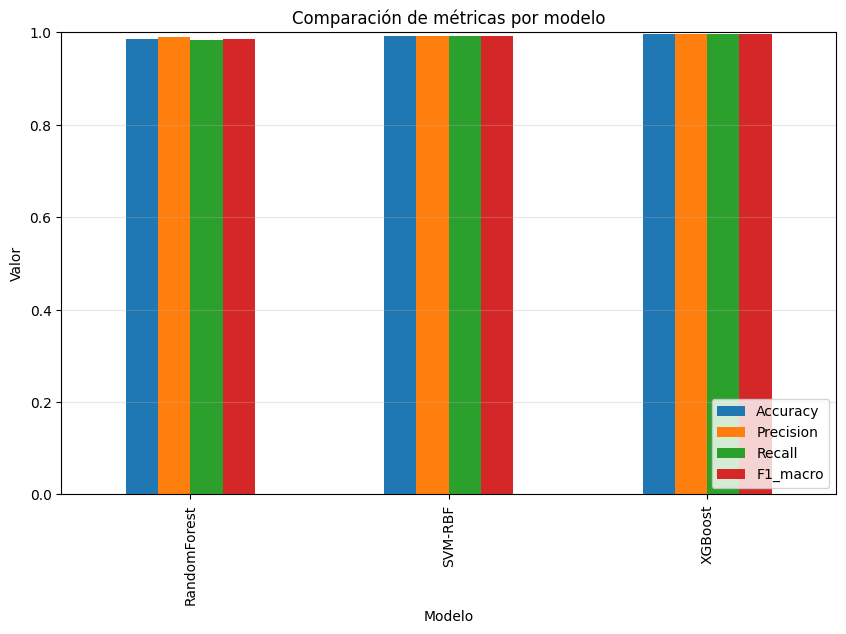

In [24]:
import matplotlib.pyplot as plt
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='lower right')
plt.show()


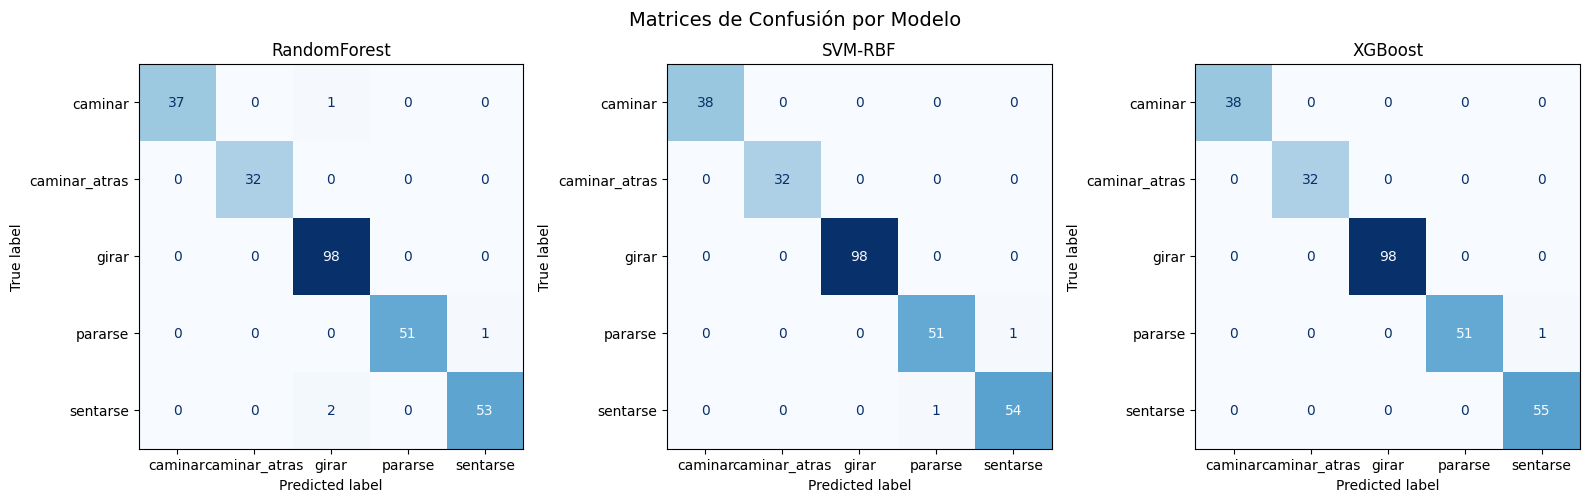

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(16,5))
models = {
    "RandomForest": rf_best,
    "SVM-RBF": svm_best,
    "XGBoost": xgb_best
}

for ax, (name, model) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        display_labels=encoder.classes_,
        cmap="Blues",
        ax=ax,
        colorbar=False
    )
    ax.set_title(name)

plt.suptitle("Matrices de Confusión por Modelo", fontsize=14)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import classification_report
for name, model in models.items():
    print(f"\n=== Reporte detallado: {name} ===")
    print(classification_report(y_test, model.predict(X_test), target_names=encoder.classes_))



=== Reporte detallado: RandomForest ===
               precision    recall  f1-score   support

      caminar       1.00      0.97      0.99        38
caminar_atras       1.00      1.00      1.00        32
        girar       0.97      1.00      0.98        98
      pararse       1.00      0.98      0.99        52
     sentarse       0.98      0.96      0.97        55

     accuracy                           0.99       275
    macro avg       0.99      0.98      0.99       275
 weighted avg       0.99      0.99      0.99       275


=== Reporte detallado: SVM-RBF ===
               precision    recall  f1-score   support

      caminar       1.00      1.00      1.00        38
caminar_atras       1.00      1.00      1.00        32
        girar       1.00      1.00      1.00        98
      pararse       0.98      0.98      0.98        52
     sentarse       0.98      0.98      0.98        55

     accuracy                           0.99       275
    macro avg       0.99      0.99    

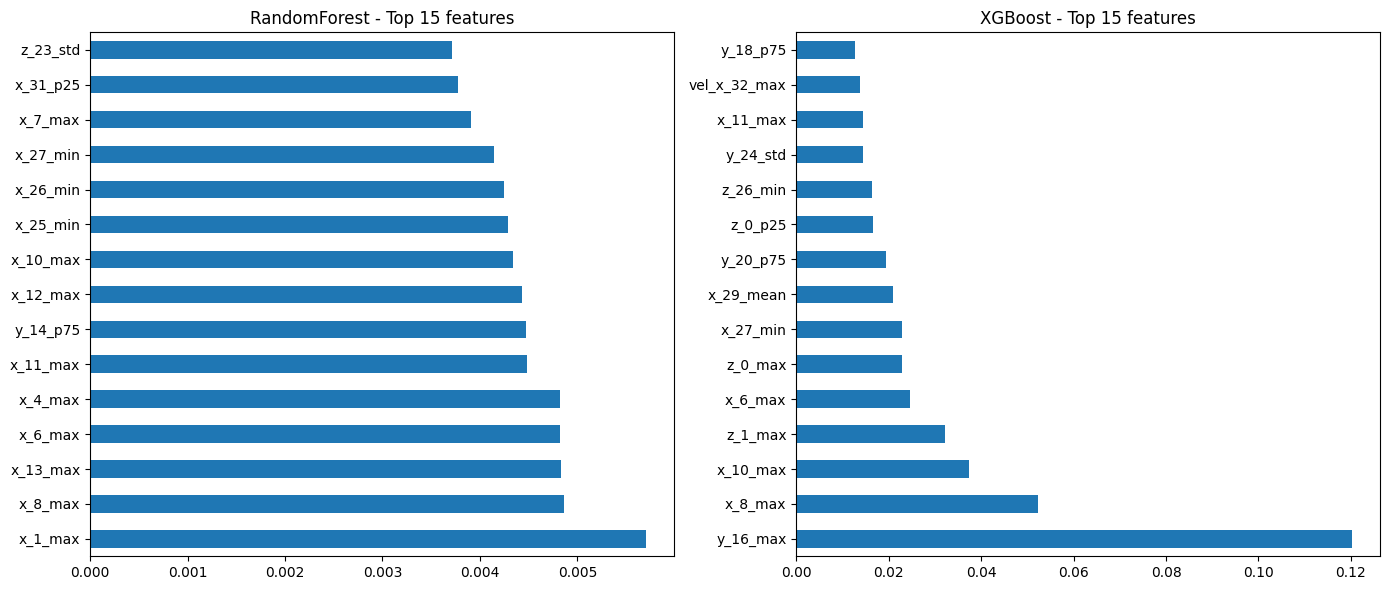

In [27]:
importances_rf = rf_best.feature_importances_
importances_xgb = xgb_best.feature_importances_

rf_top = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False).head(15)
xgb_top = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(1,2, figsize=(14,6))
rf_top.plot(kind='barh', ax=ax[0], title='RandomForest - Top 15 features')
xgb_top.plot(kind='barh', ax=ax[1], title='XGBoost - Top 15 features')
plt.tight_layout()
plt.show()


In [30]:
# Guardar todos los modelos con pickle
import pickle
import os
from sklearn.preprocessing import StandardScaler

# Crear directorio para modelos si no existe
os.makedirs('../models', exist_ok=True)

# Guardar modelos
with open('../models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_best, f)

with open('../models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_best, f)

with open('../models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

# Guardar el encoder (importante para decodificar las predicciones)
with open('../models/label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Crear y guardar un scaler para normalizar coordenadas x, y, z
# Buscar columnas de coordenadas (pueden tener sufijos como _mean, _std, etc.)
coord_cols = []
for i in range(33):
    for axis in ['x', 'y', 'z']:
        base_col = f'{axis}_{i}'
        # Buscar columnas que empiecen con el nombre base (pueden tener sufijos)
        matching_cols = [col for col in X.columns if col.startswith(base_col + '_') or col == base_col]
        coord_cols.extend(matching_cols)

# Si no encontramos columnas con sufijos, buscar las columnas base directamente
if not coord_cols:
    coord_cols = [f'{axis}_{i}' for i in range(33) for axis in ['x', 'y', 'z']]
    coord_cols = [col for col in coord_cols if col in X.columns]

# Verificar que tenemos columnas antes de crear el scaler
if len(coord_cols) > 0:
    coord_scaler = StandardScaler()
    X_coords = X[coord_cols]
    coord_scaler.fit(X_coords)
    
    with open('../models/coord_scaler.pkl', 'wb') as f:
        pickle.dump(coord_scaler, f)
    print("✓ coord_scaler guardado exitosamente")
else:
    # Si no hay columnas de coordenadas (porque ya se normalizó todo o hay agrupación),
    # crear un scaler que normalice todas las features numéricas
    print("⚠️  No se encontraron columnas de coordenadas base.")
    print("   Creando scaler para todas las features numéricas...")
    coord_scaler = StandardScaler()
    coord_scaler.fit(X)
    
    with open('../models/coord_scaler.pkl', 'wb') as f:
        pickle.dump(coord_scaler, f)
    print("✓ coord_scaler guardado (normaliza todas las features)")

print("\nModelos y scaler guardados exitosamente:")
print("- models/rf_model.pkl")
print("- models/svm_model.pkl")
print("- models/xgb_model.pkl")
print("- models/label_encoder.pkl")
print("- models/coord_scaler.pkl")

✓ coord_scaler guardado exitosamente

Modelos y scaler guardados exitosamente:
- models/rf_model.pkl
- models/svm_model.pkl
- models/xgb_model.pkl
- models/label_encoder.pkl
- models/coord_scaler.pkl


In [31]:
# Cargar un modelo y hacerle testing
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Cargar modelos guardados
print("Cargando modelos...")
with open('../models/rf_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)

with open('../models/svm_model.pkl', 'rb') as f:
    loaded_svm = pickle.load(f)

with open('../models/xgb_model.pkl', 'rb') as f:
    loaded_xgb = pickle.load(f)

# Cargar encoder y scaler
with open('../models/label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

with open('../models/coord_scaler.pkl', 'rb') as f:
    loaded_coord_scaler = pickle.load(f)

print("Modelos cargados exitosamente!\n")

# Verificar que tenemos los datos de test disponibles
if 'X_test' in globals() and 'y_test' in globals():
    print("=" * 70)
    print("EVALUACIÓN DE MODELOS CARGADOS EN CONJUNTO DE TEST")
    print("=" * 70)
    
    # Hacer predicciones con cada modelo
    print("\n1. RandomForest:")
    rf_pred = loaded_rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)
    rf_f1 = f1_score(y_test, rf_pred, average='macro')
    print(f"   Accuracy: {rf_acc:.4f}")
    print(f"   F1-macro: {rf_f1:.4f}")
    
    print("\n2. SVM:")
    svm_pred = loaded_svm.predict(X_test)
    svm_acc = accuracy_score(y_test, svm_pred)
    svm_f1 = f1_score(y_test, svm_pred, average='macro')
    print(f"   Accuracy: {svm_acc:.4f}")
    print(f"   F1-macro: {svm_f1:.4f}")
    
    print("\n3. XGBoost:")
    xgb_pred = loaded_xgb.predict(X_test)
    xgb_acc = accuracy_score(y_test, xgb_pred)
    xgb_f1 = f1_score(y_test, xgb_pred, average='macro')
    print(f"   Accuracy: {xgb_acc:.4f}")
    print(f"   F1-macro: {xgb_f1:.4f}")
    
    # Comparación
    print("\n" + "=" * 70)
    print("COMPARACIÓN DE MODELOS")
    print("=" * 70)
    comparison_df = pd.DataFrame({
        'Modelo': ['RandomForest', 'SVM', 'XGBoost'],
        'Accuracy': [rf_acc, svm_acc, xgb_acc],
        'F1-macro': [rf_f1, svm_f1, xgb_f1]
    })
    print(comparison_df.to_string(index=False))
    
    
    # Ejemplos de predicciones
    print("\n" + "=" * 70)
    print("EJEMPLOS DE PREDICCIONES (primeros 10 del test)")
    print("=" * 70)
    sample_indices = np.arange(min(10, len(X_test)))
    for idx in sample_indices:
        true_label = loaded_encoder.inverse_transform([y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]])[0]
        pred_rf = loaded_encoder.inverse_transform([rf_pred[idx]])[0]
        pred_svm = loaded_encoder.inverse_transform([svm_pred[idx]])[0]
        pred_xgb = loaded_encoder.inverse_transform([xgb_pred[idx]])[0]
        
        print(f"\nEjemplo {idx + 1}:")
        print(f"  Real: {true_label}")
        print(f"  RF: {pred_rf}, SVM: {pred_svm}, XGB: {pred_xgb}")
        if true_label == pred_xgb:
            print(f"  ✓ Correcto")
        else:
            print(f"  ✗ Incorrecto")
    
else:
    print("⚠️  No se encontraron X_test y y_test en el entorno.")
    print("   Los modelos se cargaron correctamente, pero no hay datos de test disponibles.")
    print("   Asegúrate de haber ejecutado las celdas anteriores que crean el conjunto de test.")

Cargando modelos...
Modelos cargados exitosamente!

EVALUACIÓN DE MODELOS CARGADOS EN CONJUNTO DE TEST

1. RandomForest:
   Accuracy: 0.9855
   F1-macro: 0.9869

2. SVM:
   Accuracy: 0.9927
   F1-macro: 0.9925

3. XGBoost:
   Accuracy: 0.9964
   F1-macro: 0.9963

COMPARACIÓN DE MODELOS
      Modelo  Accuracy  F1-macro
RandomForest  0.985455  0.986872
         SVM  0.992727  0.992517
     XGBoost  0.996364  0.996256

EJEMPLOS DE PREDICCIONES (primeros 10 del test)

Ejemplo 1:
  Real: girar
  RF: girar, SVM: girar, XGB: girar
  ✓ Correcto

Ejemplo 2:
  Real: caminar_atras
  RF: caminar_atras, SVM: caminar_atras, XGB: caminar_atras
  ✓ Correcto

Ejemplo 3:
  Real: pararse
  RF: pararse, SVM: pararse, XGB: pararse
  ✓ Correcto

Ejemplo 4:
  Real: pararse
  RF: pararse, SVM: pararse, XGB: pararse
  ✓ Correcto

Ejemplo 5:
  Real: pararse
  RF: pararse, SVM: pararse, XGB: pararse
  ✓ Correcto

Ejemplo 6:
  Real: pararse
  RF: pararse, SVM: pararse, XGB: pararse
  ✓ Correcto

Ejemplo 7:
  Real

# test

In [32]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from ipywidgets import FileUpload, Button, Output, VBox, HBox, Label, HTML
from IPython.display import display, clear_output
import io
import os
import pickle
from pathlib import Path

# Configuración de MediaPipe
mp_pose = mp.solutions.pose
NUM_LANDMARKS = len(list(mp_pose.PoseLandmark))

print("Módulos importados correctamente")


Módulos importados correctamente


In [33]:
# Cargar modelos y preprocesadores guardados
models_dir = Path('../models')

print("Cargando modelos...")
with open(models_dir / 'rf_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)

with open(models_dir / 'svm_model.pkl', 'rb') as f:
    loaded_svm = pickle.load(f)

with open(models_dir / 'xgb_model.pkl', 'rb') as f:
    loaded_xgb = pickle.load(f)

with open(models_dir / 'label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

with open(models_dir / 'coord_scaler.pkl', 'rb') as f:
    loaded_coord_scaler = pickle.load(f)

models_dict = {
    'RandomForest': loaded_rf,
    'SVM': loaded_svm,
    'XGBoost': loaded_xgb
}

print("✓ Modelos cargados exitosamente!")
print(f"✓ Clases disponibles: {list(loaded_encoder.classes_)}")


Cargando modelos...
✓ Modelos cargados exitosamente!
✓ Clases disponibles: ['caminar', 'caminar_atras', 'girar', 'pararse', 'sentarse']


In [34]:
def extract_landmarks_from_video(video_path):
    """Extraer landmarks de un video usando MediaPipe"""
    landmarks_list = []
    
    with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=1,
        enable_segmentation=False,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as pose:
        
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            raise Exception(f"No se pudo abrir el video: {video_path}")
        
        frame_count = 0
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        print(f"Procesando video: {total_frames} frames")
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(frame_rgb)
            
            if results.pose_landmarks:
                frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
                frame_data = {}
                
                # Extraer landmarks
                for i in range(NUM_LANDMARKS):
                    lm = results.pose_landmarks.landmark[i]
                    frame_data[f'x_{i}'] = lm.x
                    frame_data[f'y_{i}'] = lm.y
                    frame_data[f'z_{i}'] = lm.z
                    frame_data[f'visibility_{i}'] = lm.visibility
                
                landmarks_list.append(frame_data)
            
            frame_count += 1
            if frame_count % 30 == 0:
                progress = (frame_count / total_frames) * 100 if total_frames > 0 else 0
                print(f"  Procesados {frame_count}/{total_frames} frames ({progress:.1f}%)")
        
        cap.release()
    
    print(f"✓ Extracción completada: {len(landmarks_list)} frames con poses detectadas")
    print(landmarks_list)
    return landmarks_list


In [35]:
def preprocess_video_data(landmarks_data):
    """Aplicar el mismo preprocesamiento que en el entrenamiento"""
    if not landmarks_data:
        return None
    
    df = pd.DataFrame(landmarks_data)
    
    # Remover columnas de visibility
    columns_to_remove = [col for col in df.columns if 'visibility' in col]
    df = df.drop(columns=columns_to_remove)
    
    # Normalizar coordenadas
    coord_cols = [f'{axis}_{i}' for i in range(NUM_LANDMARKS) for axis in ['x', 'y', 'z']]
    available_coords = [col for col in coord_cols if col in df.columns]
    
    if available_coords:
        df[available_coords] = loaded_coord_scaler.transform(df[available_coords])
    
    # Filtrado suave (Savitzky-Golay)
    if len(df) >= 5:
        window_size = 5
        poly_order = 2
        for col in coord_cols:
            if col in df.columns:
                try:
                    df[col] = savgol_filter(df[col], window_size, poly_order)
                except:
                    pass
    elif len(df) >= 3:
        window_size = 3
        poly_order = 1
        for col in coord_cols:
            if col in df.columns:
                try:
                    df[col] = savgol_filter(df[col], window_size, poly_order)
                except:
                    pass
    
    # Calcular velocidades
    for i in range(NUM_LANDMARKS):
        for axis in ['x', 'y', 'z']:
            col = f'{axis}_{i}'
            if col in df.columns:
                df[f'vel_{axis}_{i}'] = df[col].diff().fillna(0)
    
    # Calcular ángulo del brazo derecho
    def angle_3d(a, b, c):
        ba = a - b
        bc = c - b
        cosang = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        return np.degrees(np.arccos(np.clip(cosang, -1.0, 1.0)))
    
    angles = []
    for idx in range(len(df)):
        try:
            a = np.array([df.loc[idx, f'{axis}_11'] for axis in ['x', 'y', 'z']])
            b = np.array([df.loc[idx, f'{axis}_13'] for axis in ['x', 'y', 'z']])
            c = np.array([df.loc[idx, f'{axis}_15'] for axis in ['x', 'y', 'z']])
            angles.append(angle_3d(a, b, c))
        except:
            angles.append(0)
    
    df['angle_brazo_derecho'] = angles
    
    # Calcular inclinación del tronco
    try:
        df['inclinacion_tronco'] = np.degrees(np.arctan2(
            (df['y_24'] + df['y_23']) / 2 - (df['y_12'] + df['y_11']) / 2,
            (df['z_24'] + df['z_23']) / 2 - (df['z_12'] + df['z_11']) / 2
        ))
    except:
        df['inclinacion_tronco'] = 0
    
    # Agregar frame_id
    df['frame_id'] = range(len(df))
    
    # Obtener el orden de columnas esperado
    # Intentar desde XGBoost primero
    expected_cols = None
    if hasattr(loaded_xgb, 'feature_names_in_'):
        expected_cols = list(loaded_xgb.feature_names_in_)
    elif hasattr(loaded_rf, 'feature_names_in_'):
        expected_cols = list(loaded_rf.feature_names_in_)
    
    if expected_cols:
        # Asegurar que todas las columnas esperadas existan
        for col in expected_cols:
            if col not in df.columns:
                df[col] = 0
        return df[expected_cols]
    else:
        # Ordenar columnas manualmente si no hay feature_names_in_
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        coord_cols = sorted([c for c in numeric_cols if any(c.startswith(f'{axis}_') for axis in ['x', 'y', 'z']) 
                            and not c.startswith('vel_') and c != 'frame_id'])
        frame_id_col = ['frame_id'] if 'frame_id' in df.columns else []
        vel_cols = sorted([c for c in numeric_cols if c.startswith('vel_')])
        derived_cols = []
        if 'angle_brazo_derecho' in df.columns:
            derived_cols.append('angle_brazo_derecho')
        if 'inclinacion_tronco' in df.columns:
            derived_cols.append('inclinacion_tronco')
        
        ordered_cols = coord_cols + frame_id_col + vel_cols + derived_cols
        available_cols = [col for col in ordered_cols if col in df.columns]
        return df[available_cols]


In [36]:
def predict_video(processed_data):
    """Hacer predicciones con todos los modelos"""
    predictions = {}
    
    for model_name, model in models_dict.items():
        try:
            # Asegurar que las columnas estén en el orden correcto
            if hasattr(model, 'feature_names_in_'):
                expected_cols = list(model.feature_names_in_)
                missing_cols = [col for col in expected_cols if col not in processed_data.columns]
                for col in missing_cols:
                    processed_data[col] = 0
                processed_data = processed_data[expected_cols]
            elif model_name == 'XGBoost' and hasattr(model, 'get_booster'):
                try:
                    expected_cols = model.get_booster().feature_names
                    if expected_cols:
                        missing_cols = [col for col in expected_cols if col not in processed_data.columns]
                        for col in missing_cols:
                            processed_data[col] = 0
                        processed_data = processed_data[expected_cols]
                except:
                    pass
            
            # Hacer predicciones
            frame_predictions = model.predict(processed_data)
            labels = loaded_encoder.inverse_transform(frame_predictions)
            
            # Calcular estadísticas
            unique, counts = np.unique(labels, return_counts=True)
            freq_dict = dict(zip(unique, counts))
            total = len(labels)
            
            predictions[model_name] = {
                'labels': labels,
                'frequencies': freq_dict,
                'total_frames': total,
                'most_common': max(freq_dict.items(), key=lambda x: x[1]) if freq_dict else None
            }
        except Exception as e:
            predictions[model_name] = {'error': str(e)}
            print(f"Error en {model_name}: {e}")
    
    return predictions


In [37]:
def display_results(predictions, total_frames):
    """Mostrar resultados de forma organizada"""
    print("=" * 70)
    print("RESULTADOS DEL ANÁLISIS DE POSES")
    print("=" * 70)
    print(f"\nTotal de frames procesados: {total_frames}\n")
    
    # Resultados por modelo
    for model_name, pred_data in predictions.items():
        print(f"\n{'=' * 70}")
        print(f"MODELO: {model_name}")
        print(f"{'=' * 70}\n")
        
        if 'error' in pred_data:
            print(f"ERROR: {pred_data['error']}\n")
            continue
        
        # Predicción más común
        if pred_data['most_common']:
            activity, count = pred_data['most_common']
            percentage = (count / pred_data['total_frames']) * 100
            print(f"🎯 Actividad más probable: {activity}")
            print(f"   Confianza: {percentage:.1f}% ({count}/{pred_data['total_frames']} frames)\n")
        
        # Distribución completa
        print("Distribución de actividades:")
        print("-" * 70)
        
        # Ordenar por frecuencia
        sorted_freq = sorted(pred_data['frequencies'].items(), key=lambda x: x[1], reverse=True)
        for activity, count in sorted_freq:
            percentage = (count / pred_data['total_frames']) * 100
            bar = "█" * int(percentage / 2)  # Barra visual
            print(f"  {activity:20s}: {percentage:5.1f}% ({count:4d} frames) {bar}")
        
        print()
    
    # Comparación entre modelos
    print(f"\n{'=' * 70}")
    print("COMPARACIÓN ENTRE MODELOS")
    print(f"{'=' * 70}\n")
    
    for model_name, pred_data in predictions.items():
        if 'most_common' in pred_data and pred_data['most_common']:
            activity, count = pred_data['most_common']
            percentage = (count / pred_data['total_frames']) * 100
            print(f"{model_name:15s}: {activity:20s} ({percentage:5.1f}%)")
    
    print()


In [38]:
# Función principal para procesar un video
def process_video_file(video_path):
    """Procesar un video completo: extraer, preprocesar y predecir"""
    try:
        # 1. Extraer landmarks
        print("Paso 1: Extrayendo landmarks del video...")
        landmarks_data = extract_landmarks_from_video(video_path)
        
        if not landmarks_data:
            print("❌ No se detectaron poses en el video")
            return None
        
        # 2. Preprocesar datos
        print("\nPaso 2: Preprocesando datos...")
        processed_data = preprocess_video_data(landmarks_data)
        
        if processed_data is None or len(processed_data) == 0:
            print("❌ Error en el preprocesamiento")
            return None
        
        print(f"✓ Datos preprocesados: {len(processed_data)} frames, {len(processed_data.columns)} features")
        
        # 3. Hacer predicciones
        print("\nPaso 3: Haciendo predicciones con los modelos...")
        predictions = predict_video(processed_data)
        
        # 4. Mostrar resultados
        print("\n" + "=" * 70)
        display_results(predictions, len(landmarks_data))
        
        return predictions
        
    except Exception as e:
        print(f"❌ Error al procesar el video: {str(e)}")
        import traceback
        traceback.print_exc()
        return None


In [39]:
video_path = "../../raw/raw/bra_caminar2.MOV"
predictions = process_video_file(video_path)

Paso 1: Extrayendo landmarks del video...
Procesando video: 161 frames
  Procesados 30/161 frames (18.6%)
  Procesados 60/161 frames (37.3%)
  Procesados 90/161 frames (55.9%)
  Procesados 120/161 frames (74.5%)
  Procesados 150/161 frames (93.2%)
✓ Extracción completada: 160 frames con poses detectadas
[{'x_0': 0.5268130898475647, 'y_0': 0.27018582820892334, 'z_0': -0.3095860481262207, 'visibility_0': 0.9999899864196777, 'x_1': 0.5326547622680664, 'y_1': 0.26492840051651, 'z_1': -0.2904978096485138, 'visibility_1': 0.9999600648880005, 'x_2': 0.5356512069702148, 'y_2': 0.26502227783203125, 'z_2': -0.29052695631980896, 'visibility_2': 0.9999600648880005, 'x_3': 0.5392897725105286, 'y_3': 0.2651382088661194, 'z_3': -0.2905081510543823, 'visibility_3': 0.9999550580978394, 'x_4': 0.5207402110099792, 'y_4': 0.26496922969818115, 'z_4': -0.2924500107765198, 'visibility_4': 0.9999563694000244, 'x_5': 0.5160565376281738, 'y_5': 0.26515284180641174, 'z_5': -0.2924605906009674, 'visibility_5': 0.

Traceback (most recent call last):
  File "C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\3997136117.py", line 15, in process_video_file
    processed_data = preprocess_video_data(landmarks_data)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sg504\AppData\Local\Temp\ipykernel_45692\3637805502.py", line 17, in preprocess_video_data
    df[available_coords] = loaded_coord_scaler.transform(df[available_coords])
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sg504\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sg504\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py", line 1075, in transform
    X = validate_data(
        ^^^^^^^^^^^^^^
  File "c:\Users\sg504\AppData\Local\Programs\Python\Python312\Li

In [40]:
# Alternativa: Procesar un video desde una ruta local
# Descomenta y ajusta la ruta si prefieres usar un archivo local

# video_path = "ruta/a/tu/video.mp4"
# predictions = process_video_file(video_path)
